In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle



In [26]:
Categories=['red car','blue car','black car','white car']
print("Type y to give categories or type n to go with classification of different colours of cars");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")



Type y to give categories or type n to go with classification of different colours of cars
n


In [27]:
flat_data_arr=[]
target_arr=[]
datadir='/content/drive/MyDrive/Cars/colour'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : red car
loaded category:red car successfully
loading... category : blue car
loaded category:blue car successfully
loading... category : black car
loaded category:black car successfully
loading... category : white car
loaded category:white car successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.106852,0.095087,0.122538,0.110218,0.098489,0.125869,0.111079,0.101275,0.124805,0.110188,...,0.150671,0.131063,0.136945,0.139811,0.124054,0.128011,0.137091,0.121404,0.125326,0
2,0.718931,0.718931,0.718931,0.723172,0.723172,0.723172,0.726831,0.726831,0.726831,0.729648,...,0.343630,0.324487,0.312722,0.340675,0.321446,0.309681,0.338502,0.319273,0.307508,0
3,0.745521,0.745521,0.737677,0.745524,0.745524,0.737681,0.746133,0.746133,0.738290,0.746558,...,0.877754,0.877754,0.877754,0.876393,0.876393,0.876393,0.873430,0.873430,0.873430,0
4,0.454361,0.433067,0.290108,0.477244,0.465538,0.308970,0.424172,0.424994,0.233637,0.351494,...,0.384676,0.405177,0.421505,0.376712,0.397235,0.410891,0.394620,0.415124,0.429025,0
5,0.125471,0.181245,0.050994,0.228965,0.296064,0.080535,0.216547,0.284783,0.084131,0.121300,...,0.292954,0.304718,0.230208,0.237886,0.242990,0.171810,0.154850,0.158772,0.088184,0
6,0.917647,0.917647,0.917647,0.917647,0.917647,0.917647,0.917647,0.917647,0.917647,0.917675,...,0.086165,0.098874,0.033348,0.157037,0.197849,0.102643,0.091181,0.167022,0.034389,0
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
8,0.894118,0.905882,0.941177,0.894308,0.906072,0.941366,0.896911,0.908676,0.943970,0.895299,...,0.145789,0.173240,0.196769,0.143830,0.171281,0.194811,0.137704,0.165155,0.188684,0
9,0.609571,0.589963,0.605649,0.611236,0.591629,0.607315,0.615045,0.595437,0.611123,0.615501,...,0.980772,0.980772,0.980772,0.981178,0.981178,0.981178,0.982228,0.982228,0.982228,1


In [28]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [29]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [32]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([3, 2, 0, 0, 0, 2, 3])

In [33]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([3, 2, 3, 0, 2, 0, 1])

In [34]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 42.857142857142854% accurate


In [35]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of Image/content/drive/MyDrive/Cars/colour/black car/mahindra-tuv300-1.jpg


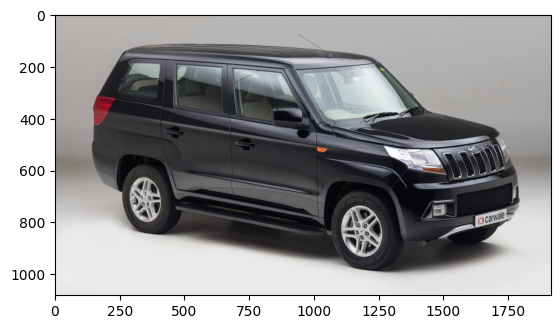

red car = 9.71266565707429%
blue car = 4.132711469368516%
black car = 74.57170632911723%
white car = 11.582916544439952%
The predicted image is : black car
Is the image a black car ?(y/n)
yes
please enter either y or n
y
Thank you for your feedback


In [36]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")
